# KNN

In [2]:
import pandas as pd

X = pd.read_csv('features_set.csv')
y = pd.read_csv('classes_set.csv')

In [3]:
y = y.drop(columns=['Unnamed: 0'])
X = X.drop(columns=['Unnamed: 0'])
y = y.astype(int)
X = X/255.

Splitting training e tesing set

In [10]:
#attenzione, ho preso pochi varoli
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42, shuffle=True)

In [20]:
X_cv = X_train.head(10000)
y_cv = y_train.head(10000)

Implementation code:

In [26]:
def euclidean(point, data):
    # Euclidean distance between points a & data
    return np.sqrt(np.sum((point - data)**2, axis=1))

In [27]:
import pandas as pd
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np
import math
import scipy.stats
#from sklearn.metrics import euclidean_distances

class my_KNN(BaseEstimator, ClassifierMixin):
    def __init__(self, k = None):
        self.k = k
    
    def fit(self, X_train, y_train, **kwargs):
        
        self.X_train = X_train
        self.y_train = y_train
        # Return the classifier
        return self
    
    def set_params(self, **params):
        for key, value in params.items():            
            setattr(self, key, value)
        return self
    
    def get_params(self, deep=True):
        return {
            'k': self.k,
        }
    
    def predict(self, X_test):
        y_pred = []
        indexes = []
        count = 0
        for index, x in X_test.iterrows():
            count += 1
            if count == 1000:
                count = 0
                print('you did 1000 iterrations')
            x = np.asarray(x)
            distances = euclidean(x, self.X_train)
            
            nearest_neighbor_ids = distances.argsort().to_numpy()[0:self.k]
            
            nearest_neighbor_rings = self.y_train.iloc[nearest_neighbor_ids]
            #find unique values in array along with their counts
            vals, counts = np.unique(nearest_neighbor_rings, return_counts=True)

            #find mode
            mode_value = np.argwhere(counts == np.max(counts))

            #mode
            pred = vals[mode_value].flatten().tolist()[0]
            
            y_pred.append(pred)
            indexes.append(index)
        return pd.Series(data=y_pred,index=indexes) 

    
    def score(self, X, y):
        """
        Return the mean accuracy on the given test data and labels.
        In multi-label classification, this is the subset accuracy
        which is a harsh metric since you require for each sample that
        each label set be correctly predicted.
        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Test samples.
        y : array-like of shape (n_samples,) or (n_samples, n_outputs)
            True labels for `X`.
        sample_weight : array-like of shape (n_samples,), default=None
            Sample weights.
        Returns
        -------
        score : float
            Mean accuracy of ``self.predict(X)`` wrt. `y`.
        """


        return accuracy_score(y, self.predict(X))

Cross Validation

In [21]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {
    'k': [3, 5, 7, 10, 15, 20]
}
# Create a based model
kNN = my_KNN()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = kNN, param_grid = param_grid, 
                          cv = 10, n_jobs=5,verbose = 3)
start = time.time()
grid_search.fit(X_cv, y_cv)
end = time.time()
print("The time of execution of above program is :",
      (end-start), "s")
print ("Best Score: {:.3f}".format(grid_search.best_score_) )
print ("Best Params: ", grid_search.best_params_)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
The time of execution of above program is : 2808.0129442214966 s
Best Score: 0.946
Best Params:  {'k': 3}


Fit:

In [28]:
knn = my_KNN(k = 3)
knn.fit(X_train, y_train)

my_KNN(k=3)

Predict on Training Set:

In [ ]:
import time
from sklearn.metrics import accuracy_score
# compute accuracy
start = time.time()
y_pred = knn.predict(X_train)
end = time.time()
print("The time of execution of above program is :",
      (end-start), "s")
acc = accuracy_score(y_true=y_train, y_pred=y_pred)
print ("on test Accuracy {:.3f}".format(acc) ) 

you did 1000 iterrations
you did 1000 iterrations
you did 1000 iterrations
you did 1000 iterrations


Predict on Testing Set:

In [18]:
import time
from sklearn.metrics import accuracy_score
# compute accuracy
start = time.time()
y_pred = knn.predict( X_test )
end = time.time()
print("The time of execution of above program is :",
      (end-start), "s")
acc = accuracy_score(y_true=y_test, y_pred=y_pred)
print ("on test Accuracy {:.3f}".format(acc) ) 

you did 1000 iterrations
you did 1000 iterrations
you did 1000 iterrations
you did 1000 iterrations
you did 1000 iterrations
you did 1000 iterrations
you did 1000 iterrations
you did 1000 iterrations
you did 1000 iterrations
you did 1000 iterrations
The time of execution of above program is : 2306.530802488327 s
on test Accuracy 0.968


Below we visualize some test samples and show their predicted digit value in the title:

In [31]:
from PIL import Image 
from matplotlib import cm 
 
def print_image(image): 
    myarray = np.reshape(image.to_numpy(), (28,28)) 
    im = Image.fromarray(np.uint8(cm.gist_earth(myarray)*255)) 
    width, height = im.size 
    new_width  = 300 
    new_height = new_width * height / width  
    new_height = 300 
    new_width  = new_height * width / height 
    img = im.resize((int(new_width), int(new_height)), Image.ANTIALIAS) 
    return img

C:\Users\victo\AppData\Local\Temp\ipykernel_13804\663486975.py:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = im.resize((int(new_width), int(new_height)), Image.ANTIALIAS)


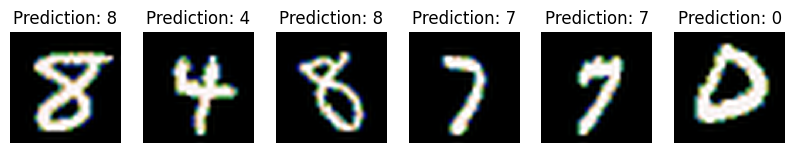

In [35]:
n = 6 
_, axes = plt.subplots(nrows=1, ncols=n, figsize=(10, 3)) 
for ax, i, i in zip(axes, range(n), range(n)): 
    ax.set_axis_off() 
    image = print_image(X_test.iloc[i]) 
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest") 
    ax.set_title(f"Prediction: {y_pred.to_numpy()[i]}")

In [142]:
         
def missclassify(y_pred, y_test):
    indexes = []
    for index, row in y_test.iterrows(): 
        if(y_pred[index]!=row['class']):
            indexes.append(index)
    return indexes


C:\Users\victo\AppData\Local\Temp\ipykernel_13804\663486975.py:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = im.resize((int(new_width), int(new_height)), Image.ANTIALIAS)


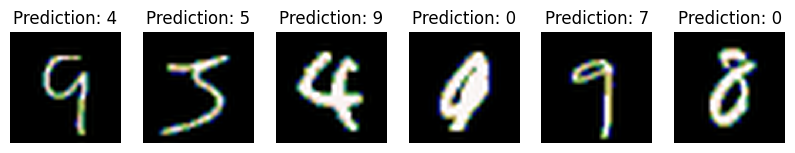

In [143]:
list = missclassify(y_pred, y_test)
n = 6 
_, axes = plt.subplots(nrows=1, ncols=n, figsize=(10, 3)) 
for ax, i, i in zip(axes, list, list): 
    ax.set_axis_off() 
    image = print_image(X.iloc[i]) 
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest") 
    ax.set_title(f"Prediction: {y_pred[i]}")


Confusion Matrix

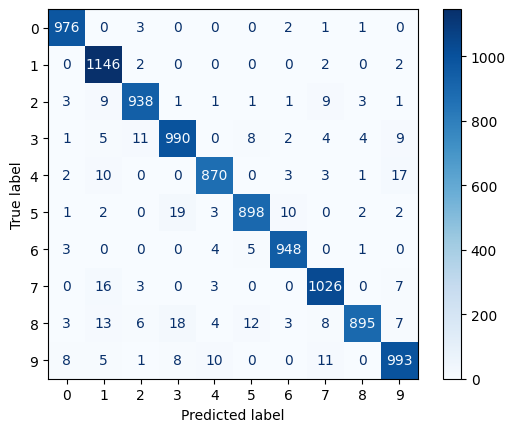

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay 
import numpy as np 
 
cm = confusion_matrix(y_test, y_pred, labels=sorted(list(y['class'].unique()))) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                             display_labels=sorted(list(y['class'].unique())), 
                             ) 
disp.plot(cmap=plt.cm.Blues) 
 
plt.show()